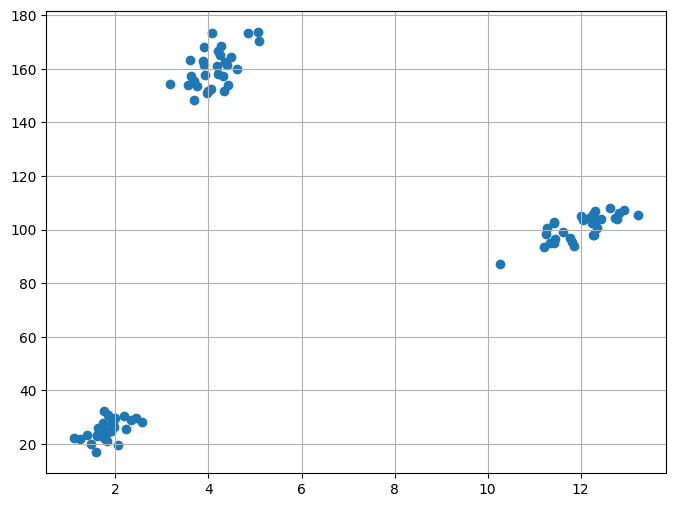

In [209]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

distributions = [
    dict(mean=[1.8, 25],  cov=[[0.1, 0.5], [0.5, 10]],  size=30),
    dict(mean=[4.0, 160], cov=[[0.2, 2],   [2, 50]],    size=30),
    dict(mean=[12.0, 100], cov=[[0.5, 3],  [3, 30]],    size=30),
]

X = np.concatenate([
    np.random.multivariate_normal(d["mean"], d["cov"], d["size"])
    for d in distributions
], axis=0)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

X = X.tolist()

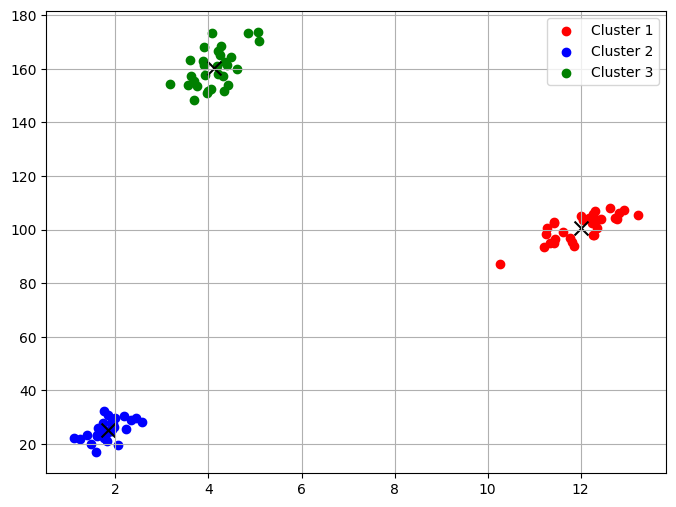

In [223]:
from random import sample, shuffle

shuffle(X)

def distance(a, b):
    return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

def clear_clusters(clusters):
    for cluster in clusters:
        cluster['points'].clear()

def add_point_to_nearest_cluster(point, clusters):
    distances = [(i, distance(point, c['centroid'])) for i, c in enumerate(clusters)]
    nearest_centroid = min(distances, key=lambda c: c[1])[0]
    clusters[nearest_centroid]['points'].append(point)

def update_cluster_centroid(cluster):
    new_centroid = []
    n_points = len(cluster['points'])
    for i in range(len(cluster['centroid'])):
        feature_avg = sum([point[i] for point in cluster['points']]) / n_points
        new_centroid.append(feature_avg)
    cluster['centroid'] = new_centroid

def k_means(X, n_clusters, max_iter=100):
    clusters = []
    initial_centroids = sample(X, n_clusters)
    for centroid in initial_centroids:
        clusters.append({'centroid': centroid, 'points': []})
    for _ in range(max_iter):
        clear_clusters(clusters)
        for point in X:
            add_point_to_nearest_cluster(point, clusters)
        for cluster in clusters:
            update_cluster_centroid(cluster)
    return clusters

clusters = k_means(X, 3)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for i, cluster in enumerate(clusters):
    if cluster['points']:
        xs, ys = zip(*cluster['points'])
        plt.scatter(xs, ys, color=colors[i], label=f'Cluster {i + 1}')
        plt.scatter(*cluster['centroid'], color='black', marker='x', s=100)

plt.legend()
plt.grid(True)
plt.show()